In [ ]:
import csv
import collections
import matplotlib
import re
%matplotlib inline
# matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
df = pd.read_pickle('data/ira_tweets.pkl')

### Tweets per day (Russian/English)

In [ ]:
plt.figure(figsize=(10,8))
# ax = pd.DatetimeIndex(df['tweet_time']).normalize().value_counts().plot()
# plt.subplot(211)
ax=pd.DatetimeIndex(df.loc[df['tweet_language'] == 'en']['tweet_time']).normalize().value_counts().plot(label='English (US)')
plt.xlim(pd.Timestamp('2012-01-01'), pd.Timestamp('2018-10-24'))
# plt.ylim(0,12000)
# plt.legend()
# plt.subplot(212)
pd.DatetimeIndex(df.loc[df['tweet_language'] == 'ru']['tweet_time']).normalize().value_counts().plot(ax=ax,label='Russian')
plt.xlim(pd.Timestamp('2012-01-01'), pd.Timestamp('2018-10-24'))
plt.ylim(0,12000)
plt.legend()
plt.show()

## Hashtags embedded in tweets

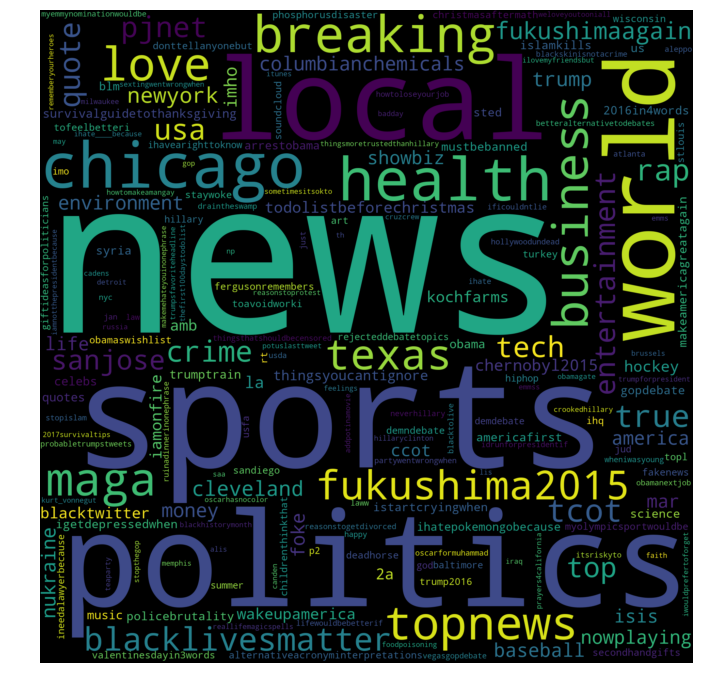

In [4]:
# Get English tweets
en_tweets = df.loc[df['tweet_language'] == 'en']
# Clean up tweets, drop NaNs 
en_hashtags = en_tweets.loc[en_tweets['hashtags'] != '[]']['hashtags'].dropna()
# Strip out [] and split em up between whitespace and comma
en_hashtags = en_hashtags.str.lower().str.strip('[]').str.split(', ')

# Combine into one list 
htags = [y for x in en_hashtags for y in x]
tag_count = collections.Counter()
for w in htags:
    tag_count[w] += 1

wordcloud = WordCloud(width=2000, height=2000)
wordcloud.generate_from_frequencies(frequencies=tag_count)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
len(htags)

442754

## Hashtags embedded in profile description

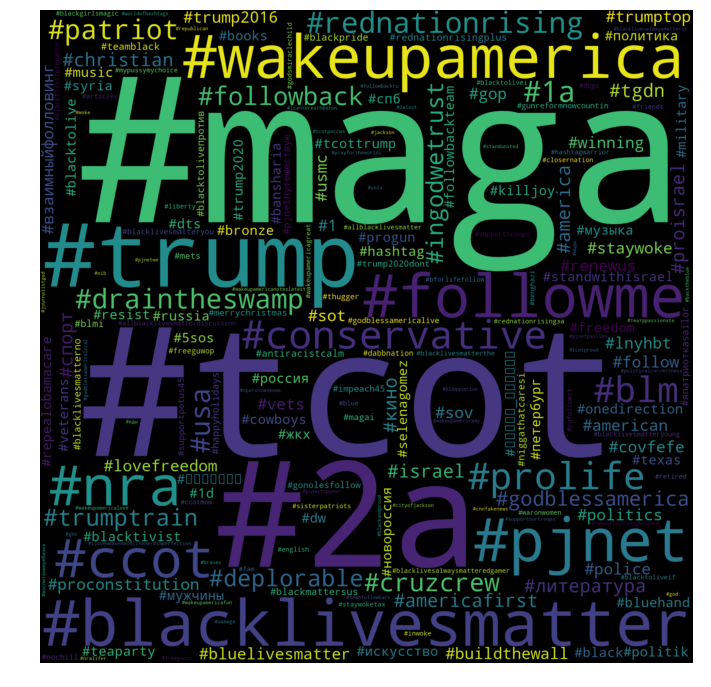

In [6]:
en_profiles = en_tweets.drop_duplicates('userid')
profile_string = en_profiles['user_profile_description'].str.lower().str.cat()
profile_hashtags = re.findall(r'\#\w+', profile_string)

tag_count = collections.Counter()
for w in profile_hashtags:
    tag_count[w] += 1

wordcloud = WordCloud(width=2000, height=2000)
wordcloud.generate_from_frequencies(frequencies=tag_count)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tag_count.most_common()